
# Data visualization using Python

## Introduction

Data visualization is a basic task in data exploration and understanding. Humans are mainly visual creatures, and data visualization provides an opportunity to enhance communication of the story within the data. Often we find that data and the data-generating process is complex, and a visual representation of the data and our innate ability at pattern recognition can help reveal the complexities in a cognitively accessible way.

### An example gallery

Data visualization has a long and storied history, from Florence Nightangle onwards. Dr. Nightangle was a pioneer in data visualization and developed the *rose plot* to represent causes of death in hospitals during the Crimean War.

![](graphs/rose.jpg)

 John Snow, in 1854, famously visualized the cholera outbreak in London, which showed the geographic proximity of cholera prevalence with particular water wells.

![](graphs/snow_map.png)

In one of the more famous visualizations, considered by many to be an optimal use of display ink and space, Minard visualized Napoleon's disastrous campaign to Russia

![](graphs/map-full-size1.png)

In more recent times, an employee at Facebook visualized all connections between users across the world, which clearly showed geographical associations with particular countries and regions.

![](graphs/facebook-high-res-friendship-world-map-paul-butler.png)

### Why visualize data?

We often rely on numerical summaries to help understand and distinguish datasets. In 1973, Anscombe published an influential set of 4 datasets, each with two variables and with the means, variances and correlations being identical. When you graphed these data, the differences in the datasets were clearly visible. This set is popularly known as Anscombe's quartet.

![](graphs/anscombe.png)

A more recent experiment in data construction by Matejka and Fitzmaurice (2017) started with a representation of a dinosaur and created 10 more bivariate datasets which all shared the same univariate means and variances and the same pairwise correlations.

![](graphs/datasaurus.png)

These examples clarify the need for visualization to better understand relationships between variables. 

Even when using statistical visualization techniques, one has to be careful. Not all visualizations can discriminate between statistical characteristics. This was also explored by Matejka and Fitzmaurice. 

|      Strip plot      |       Boxplot        |     Violin plot      |
| :------------------: | :------------------: | :------------------: |
| ![](graphs/box1.png) | ![](graphs/box2.png) | ![](graphs/box3.png) |

### Conceptual ideas

#### Begin with the consumer in mind

+ You have a deep understanding of the data you're presenting
+ The person seeing the visualization **doesn't**
+ Develop simpler visualizations first that are easier to explain

#### Tell a story

+ Make sure the graphic is clear
+ Make sure the main point you want to make "pops"

#### A matter of perception

+ Color (including awareness of color deficiencies)
+ Shape
+ Fonts

#### Some principles

1. Data-ink ratio
2. No mental gymnastics
    1. The graphic should be self-evident
    2. Context should be clear
3. Is a graph the wrong choice?
4. Focus on the consumer

> See [my slides](http://araastat.com/BIOF439/slides/lectures/01-DataViz.pdf) for some more opinionated ideas

## Plotting in Python

Let's take a very quick tour before we get into the weeds. We'll use the mtcars dataset as an exemplar dataset that we can import using `pandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This part is setting up the default fonts (DejaVu Sans) and background color (white). These aspects and many others are highly customizable. For a look at what is possible the `seaborn` [documentation](https://seaborn.pydata.org/index.html) has tutorials and examples that build on the information shared here. 

In [5]:
sns.set_context('paper')
sns.set_style('white', {'font.family':'DejaVu Sans'})

In [6]:
mtcars = pd.read_csv('data/mtcars.csv')

### Static plots

We will demonstrate plotting in what I'll call the `matplotlib` ecosystem. `matplotlib` is the venerable and powerful visualization package that was originally designed to emulate the Matlab plotting paradigm. It has since evolved and as become a bit more user-friendly. It is still quite granular and can facilitate a lot of custom plots once you become familiar with it. However, as a starting point, I think it's a bit much. We'll see a bit of what it can offer later.

We will consider two other options which are built on top of `matplotlib`, but are much more accessible. These are `pandas` and `seaborn`. The two packages have some different approaches, but both wrap `matplotlib` in higher-level code and decent choices so we don't need to get into the `matplotlib` trenches quite so much. We'll still call `matplotlib` in our code, since both these packages need it for some fine tuning. Both packages are also very much aligned to the `DataFrame` construct in `pandas`, so makes plotting a much more seamless experience. 

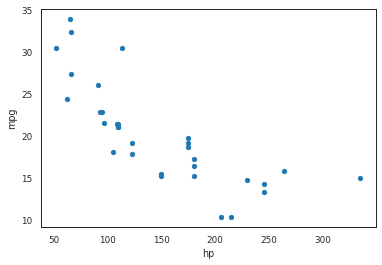

In [7]:
mtcars.plot.scatter(x = 'hp', y = 'mpg')
plt.show()


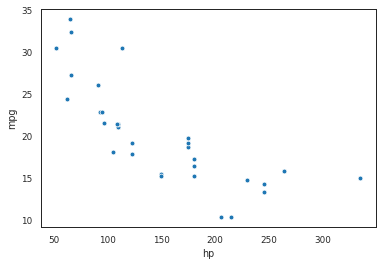

In [8]:
sns.scatterplot(data = mtcars, x = 'hp', y = 'mpg');
plt.show()

There are of course some other choices based on your background and preferences. For static plots, there are a couple of emulators of the popular R package `ggplot2`. These are `plotnine` and `ggplot`. `plotnine` seems a bit more developed and uses the `ggplot2` semantics of aesthetics and layers, with almost identical code syntax. 

> You can install `plotnine` using `conda`: 
>
> ```shell
> conda install -c conda-forge plotnine
> ```

You can find installation instructions for all of the packages bellow by googling conda install "name of package" the annaconda website will come right up

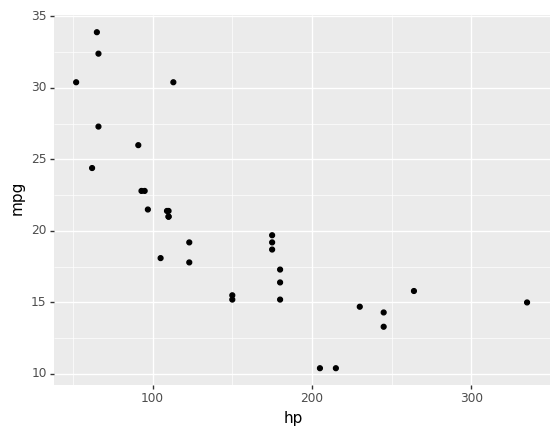

<ggplot: (8789181920137)>

In [7]:
from plotnine import *

(ggplot(mtcars) + 
  aes(x = 'hp', y = 'mpg') +
  geom_point())

### Dynamic or interactive plots

There are several Python packages that wrap around Javascript plotting libraries that are so popular in web-based graphics like D3 and Vega. Three that deserve mention are `plotly`, `bokeh`, and `altair`.

> If you actually want to experience the interactivity of the plots, please use the "Live notebooks" link in Canvas to run these notebooks. Otherwise, you can download the notebooks from the GitHub site and run them on your own computer. 

`plotly` is a Python package developed by the company [Plot.ly](https://www.plotly.com) to interface with their interactive Javascript library either locally or via their web service. Plot.ly also develops an R package to interface with their products as well. It provides an intuitive syntax and ease of use, and is probably the more popular package for interactive graphics from both R and Python.

In [8]:
import plotly.express as px

fig = px.scatter(mtcars, x = 'hp', y = 'mpg')
fig.show()

`bokeh` is an interactive visualization package developed by Anaconda. It is quite powerful, but its code can be rather verbose and granular

In [9]:
from bokeh.plotting import figure, output_file
from bokeh.io import output_notebook, show
output_notebook()
p = figure()
p.xaxis.axis_label = 'Horsepower'
p.yaxis.axis_label = 'Miles per gallon'

p.circle(mtcars['hp'], mtcars['mpg'], size=10);

show(p)

Loading BokehJS ...

`altair` that leverages ideas from Javascript plotting libraries and a distinctive code syntax that may appeal to some

In [10]:
import altair as alt

alt.Chart(mtcars).mark_point().encode(
    x='hp',
    y='mpg'
).interactive()

alt.Chart(...)

We won't focus on these dynamic packages in this workshop in the interests of time, but you can avail of several online resources for these.

| Package | Resources                                                    |
| ------- | ------------------------------------------------------------ |
| plotly  | [Fundamentals](https://plotly.com/python/)                   |
| bokeh   | [Tutorial](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb) |
| altair  | [Overview](https://altair-viz.github.io/getting_started/overview.html) |

## Univariate plots (lecture ends above)

We will be introducing plotting and code from 3 modules: `matplotlib`, `seaborn` and `pandas`. As we go forth, you may ask the question, which one should I learn? Chris Moffitt has the following advice.

A pathway to learning ([Chris Moffit](https://pbpython.com/effective-matplotlib.html))

1. Learn the basic matplotlib terminology, specifically what is a `Figure` and an `Axes` .
2. Always use the object-oriented interface. Get in the habit of using it from the start of your analysis. (*not really getting into this, but basically don't use the Matlab form I'll show at the end, if you don't have to*)
3. Start your visualizations with basic pandas plotting.
4. Use seaborn for the more complex statistical visualizations.
5. Use matplotlib to customize the pandas or seaborn visualization.

### pandas

#### Histogram

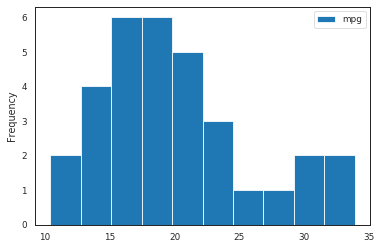

In [11]:
mtcars.plot.hist(y = 'mpg');
plt.show()
# mtcars.plot(y = 'mpg', kind = 'hist')
#mtcars['mpg'].plot(kind = 'hist')

#### Bar plot

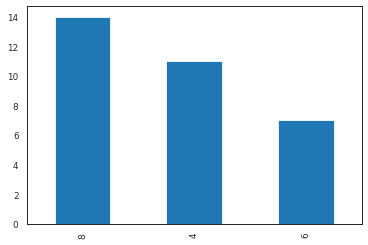

In [12]:
mtcars['cyl'].value_counts().plot.bar();
plt.show()

#### Density plot

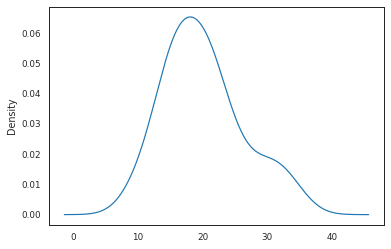

In [13]:
mtcars['mpg'].plot( kind = 'density');
plt.show()

### seaborn

#### Histogram

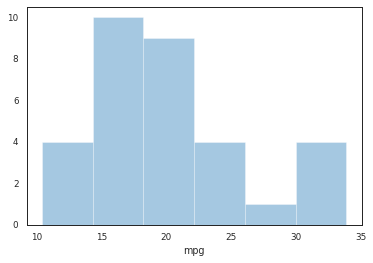

In [14]:
ax = sns.distplot(mtcars['mpg'], kde=False);
plt.show()

#### Bar plot

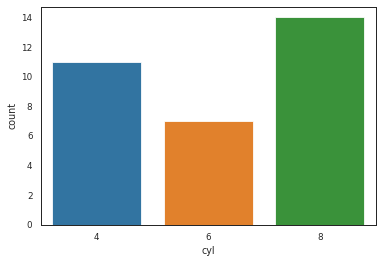

In [15]:
sns.countplot(data = mtcars, x = 'cyl');
plt.show()

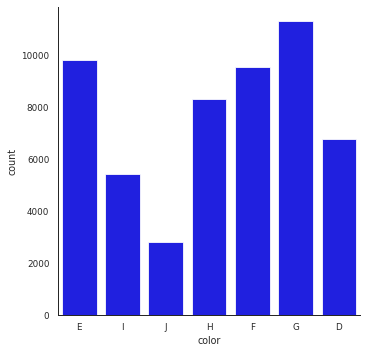

In [16]:
diamonds = pd.read_csv('data/diamonds.csv.gz')
#ordered_colors = ['E','F','G','H','I','J']
filtered_diamonds = diamonds[(diamonds['color'] == 'E') | (diamonds['color'] == 'E')]
sns.catplot(data = diamonds, x = 'color', kind = 'count', color = 'blue')
plt.show()

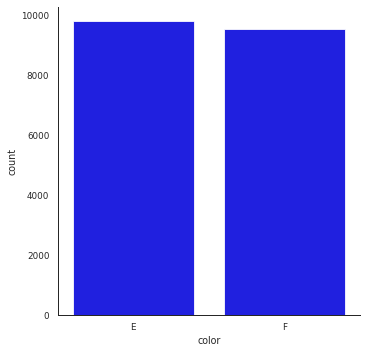

In [19]:
# this line filtered_diamonds created a new dataset using what is called a boolean to only save the rows which
# have 'color' = E or 'color' = F the pipe (|) means or (it is located above the enter key) 

filtered_diamonds = diamonds[(diamonds['color'] == 'E') | (diamonds['color'] == 'F')]
sns.catplot(data = filtered_diamonds, x = 'color', kind = 'count', color = 'blue')
plt.show()

#### Density plot

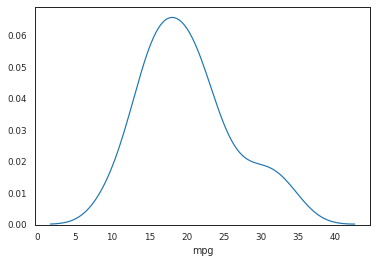

In [10]:
sns.distplot(mtcars['mpg'], hist=False);
plt.show()

## Bivariate plots

### pandas

#### Scatter plot

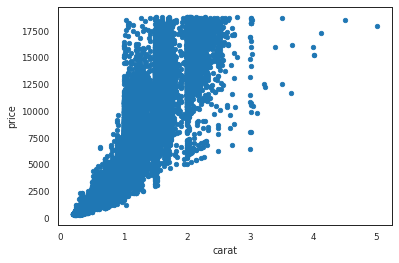

In [11]:
diamonds = pd.read_csv('data/diamonds.csv.gz')
diamonds.plot(x = 'carat', y = 'price', kind = 'scatter');
plt.show()

In [12]:
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

#### Box plot

findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.


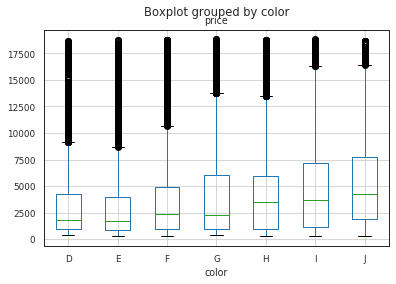

In [19]:
diamonds.boxplot(column = 'price', by = 'color');
plt.show()

### seaborn

#### Scatter plot

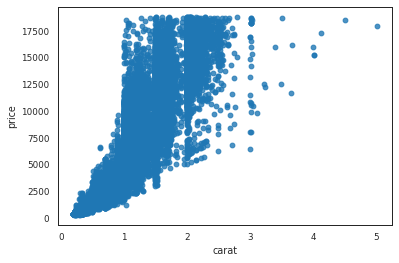

In [20]:
sns.regplot(data = diamonds, x = 'carat', y = 'price', fit_reg=False);
plt.show()

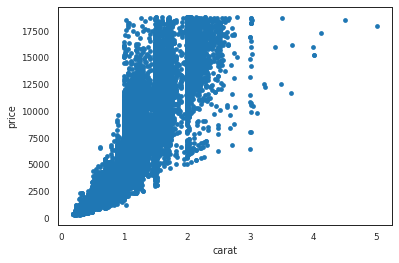

In [21]:
sns.scatterplot(data=diamonds, x = 'carat', y = 'price', linewidth=0); 
# We set the linewidth to 0, otherwise the lines around the circles
# appear white and wash out the figure. Try with any positive 
# value of linewidth

#### Box plot

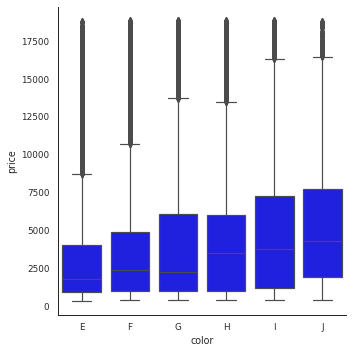

In [22]:
ordered_color = ['E','F','G','H','I','J']
sns.catplot(data = diamonds, x = 'color', y = 'price', 
            order = ordered_color, color = 'blue', kind = 'box');
plt.show()

#### Violin plot

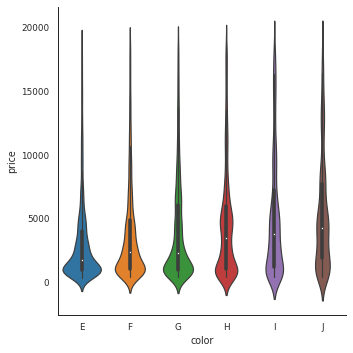

In [23]:
g = sns.catplot(data = diamonds, x = 'color', y = 'price', 
                kind = 'violin', order = ordered_color);
plt.show()

#### Barplot (categorical vs continuous)

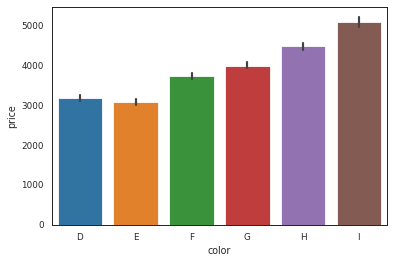

In [24]:
ordered_colors = ['D','E','F','G','H','I']
sns.barplot(data = diamonds, x = 'color', y = 'price', order = ordered_colors);
plt.show()

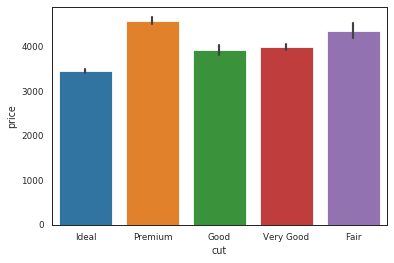

In [25]:
sns.barplot(data = diamonds, x = 'cut', y = 'price');
plt.show()

#### Joint plot

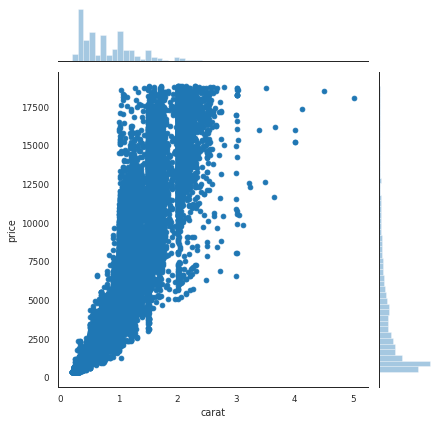

In [26]:
sns.jointplot(data = diamonds, x = 'carat', y = 'price');
plt.show()

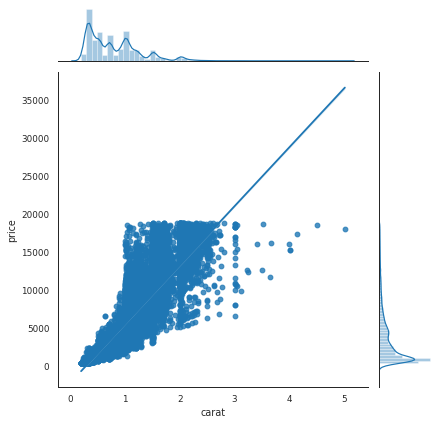

In [27]:
sns.jointplot(data = diamonds, x = 'carat', y = 'price', kind = 'reg');
plt.show()

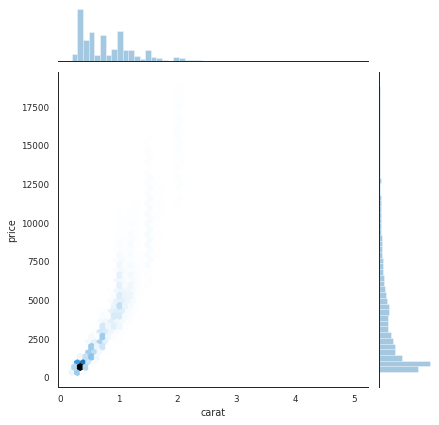

In [28]:
sns.jointplot(data = diamonds, x = 'carat', y = 'price', kind = 'hex');
plt.show()

## Facets and multivariate data

The basic idea in this section is to see how we can visualize more than two variables at a time. We will see two strategies:

1. Put multiple graphs on the same frame, with each graph referring to a level of a 3rd variable
1. Create a grid of separate graphs, with each graph referring to a level of a 3rd variable

This strategy also can work any time we need to visualize the data corresponding to different levels of a variable, say by gender or race or country. 

In this example we're going to start with 4 time series, labelled A, B, C, D. 

In [29]:
ts = pd.read_csv('data/ts.csv')
ts.dt = pd.to_datetime(ts.dt) # convert this column to a datetime object
ts.head()

dt kind     value
0 2000-01-01    A  1.442521
1 2000-01-02    A  1.981290
2 2000-01-03    A  1.586494
3 2000-01-04    A  1.378969
4 2000-01-05    A -0.277937

For one strategy we will employ, it is actually a bit easier to change this to a wide data form, using `pivot`. 

In [30]:
dfp = ts.pivot(index = 'dt', columns = 'kind', values = 'value')
dfp.head()

kind               A         B         C         D
dt                                                
2000-01-01  1.442521  1.808741  0.437415  0.096980
2000-01-02  1.981290  2.277020  0.706127 -1.523108
2000-01-03  1.586494  3.474392  1.358063 -3.100735
2000-01-04  1.378969  2.906132  0.262223 -2.660599
2000-01-05 -0.277937  3.489553  0.796743 -3.417402

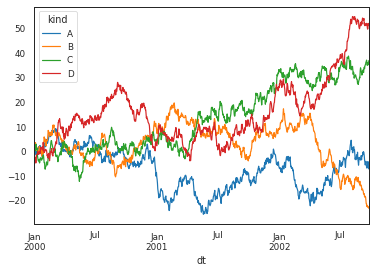

In [31]:
fig, ax = plt.subplots()
dfp.plot(ax=ax);
plt.show()

This creates 4 separate time series plots, one for each of the columns labeled A, B, C and D. The x-axis is determined by `dfp.index`, which during the pivoting operation, we deemed was the values of `dt` in the original data. 

Using `seaborn`...

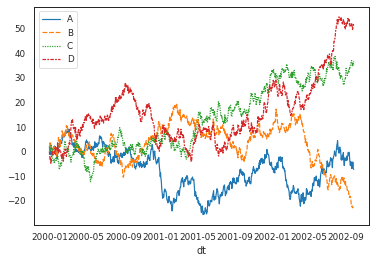

In [32]:
sns.lineplot(data = dfp);
plt.show()

However, we can achieve this same plot using the original data, and `seaborn`, in rather short order

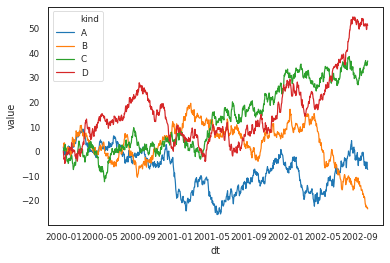

In [33]:
sns.lineplot(data = ts, x = 'dt', y = 'value', hue = 'kind');
plt.show()

In this plot, assigning a variable to `hue` tells seaborn to draw lines (in this case) of different hues based on values of that variable. 

We can use a bit more granular and explicit code for this as well. This allows us a bit more control of the plot.

findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.


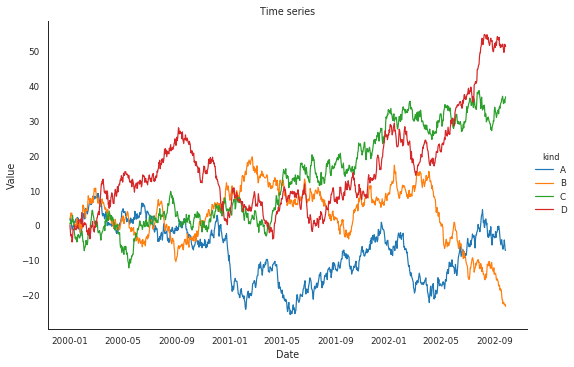

In [34]:
g = sns.FacetGrid(ts, hue = 'kind', height = 5, aspect = 1.5)
g.map(plt.plot, 'dt', 'value').add_legend()
g.ax.set(xlabel = 'Date',
        ylabel = 'Value',
        title = 'Time series');
plt.show()

## All of this code chunk needs to be run at one time, otherwise you get weird errors. This
## is true for many plotting commands which are composed of multiple commands. 

The `FacetGrid` tells `seaborn` that we're going to layer graphs, with layers based on `hue` and the hues being determined by values of `kind`. Notice that we can add a few more details like the aspect ratio of the plot and so on. The documentation for [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), which we will also use for facets below, may be helpful in finding all the options you can control.

We can also show more than one kind of layer on a single graph

In [35]:
fmri = sns.load_dataset('fmri')

findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.


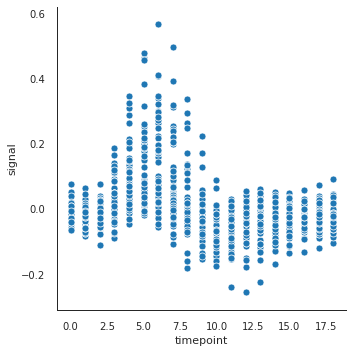

In [36]:
plt.style.use('seaborn-notebook')
sns.relplot(x = 'timepoint', y = 'signal', data = fmri);
plt.show()

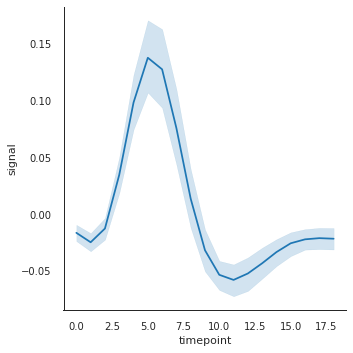

In [37]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line');
plt.show()

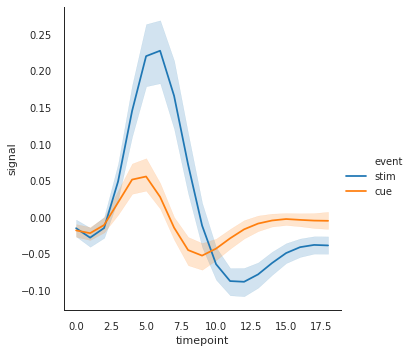

In [38]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', hue ='event');
plt.show()

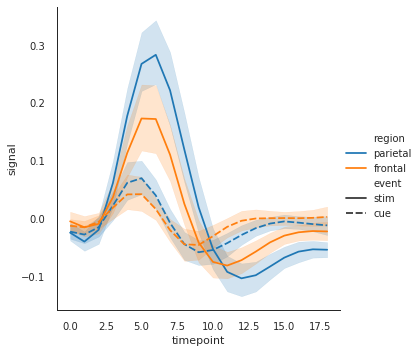

In [39]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, hue = 'region', 
            style = 'event', kind = 'line');
plt.show()

Here we use color to show the region, and line style (solid vs dashed) to show the event.

#### Scatter plots by group

findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.


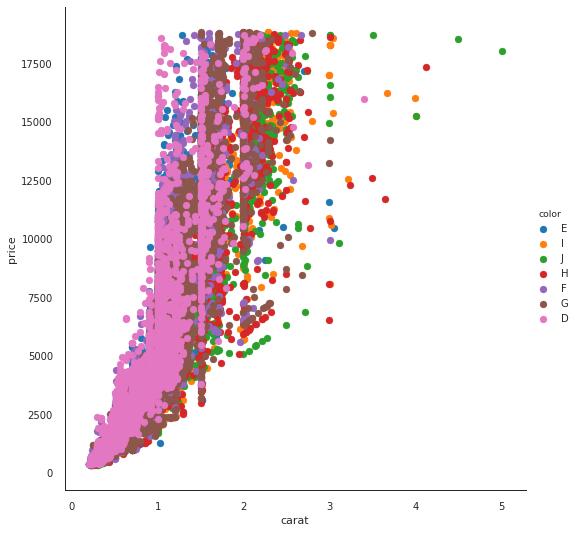

In [40]:
g = sns.FacetGrid(diamonds, hue = 'color', height = 7.5)
g.map(plt.scatter, 'carat', 'price').add_legend();
plt.show()

Notice that this arranges the colors and values for the `color` variable in random order. If we have a preferred order we can impose that using the option `hue_order`. 

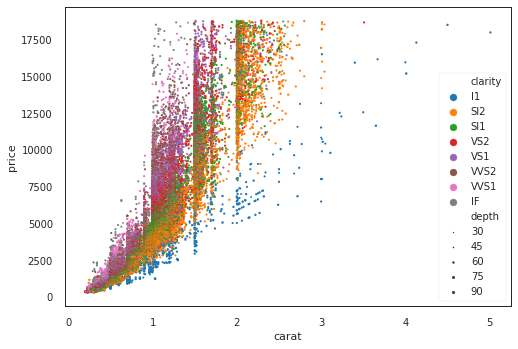

In [41]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds);
plt.show() 

### Facets

Facets or trellis graphics is a visualization method where we draw multiple plots in a grid, with each plot corresponding to unique values of a particular variable or combinations of variables. This has also been called *small multiples*. 

We'll proceed with an example using the `iris` dataset.

In [42]:
iris = pd.read_csv('data/iris.csv')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

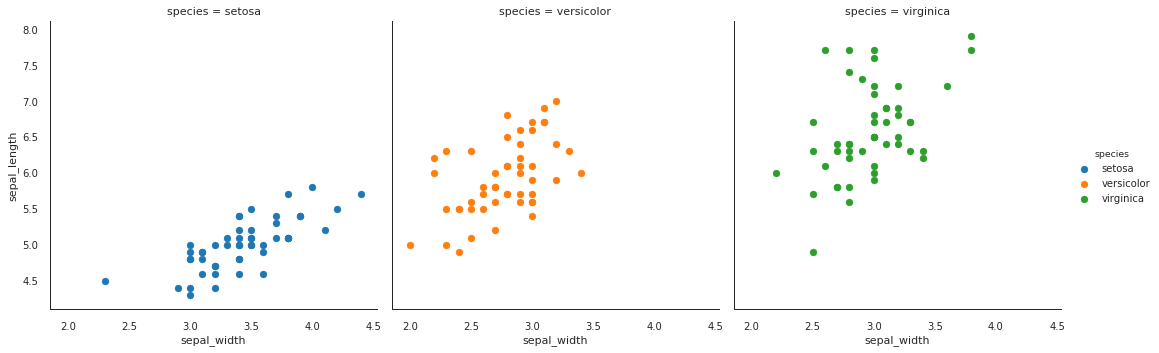

In [43]:
g = sns.FacetGrid(iris, col = 'species', hue = 'species', height = 5)
g.map(plt.scatter, 'sepal_width', 'sepal_length').add_legend();
plt.show()

Here we use `FacetGrid` to indicate that we're creating multiple subplots by specifying the option `col` (for column). So this code says we are going to create one plot per level of species, arranged as separate columns (or in effect along one row). You could also specify `row` which would arrange the plots one to a row, or, in effect, in one column. 

The `map` function says, take the facets I've defined and stored in `g`, and in each one, plot a scatter plot with `sepal_width` on the x-axis and `sepal_length` on the y-axis. 

We could also use `relplot` for a more compact solution.

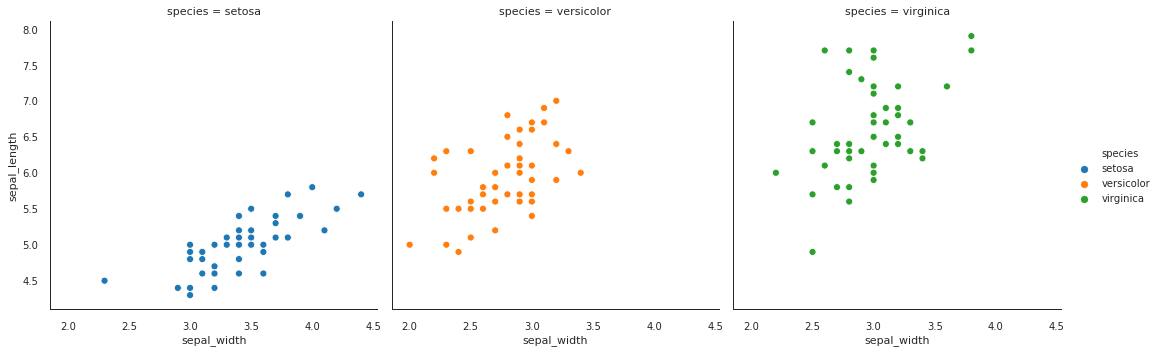

In [44]:
sns.relplot(x = 'sepal_width', y = 'sepal_length', data = iris, 
            col = 'species', hue = 'species');
plt.show()

A bit more of a complicated example, using the `fmri` data, where we're coloring lines based on the subject, and creating a 2-d grid, where region of the brain in along columns and event type is along rows. 

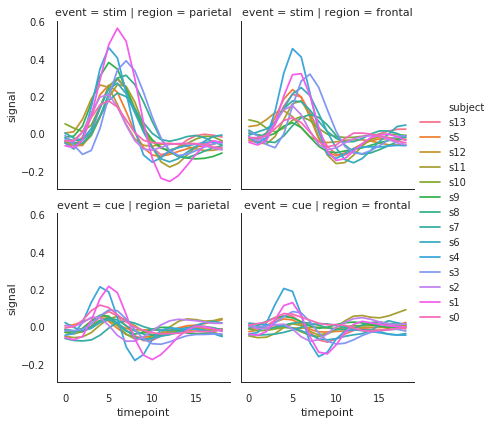

In [45]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);
plt.show()

In the following example, we want to show how each subject fares for each of the two events, just within the frontal region. We let `seaborn` figure out the layout, only specifying that we'll be going along rows ("by column") and also saying we'll wrap around to the beginning once we've got to 5 columns. Note we use the `query` function to filter the dataset. 

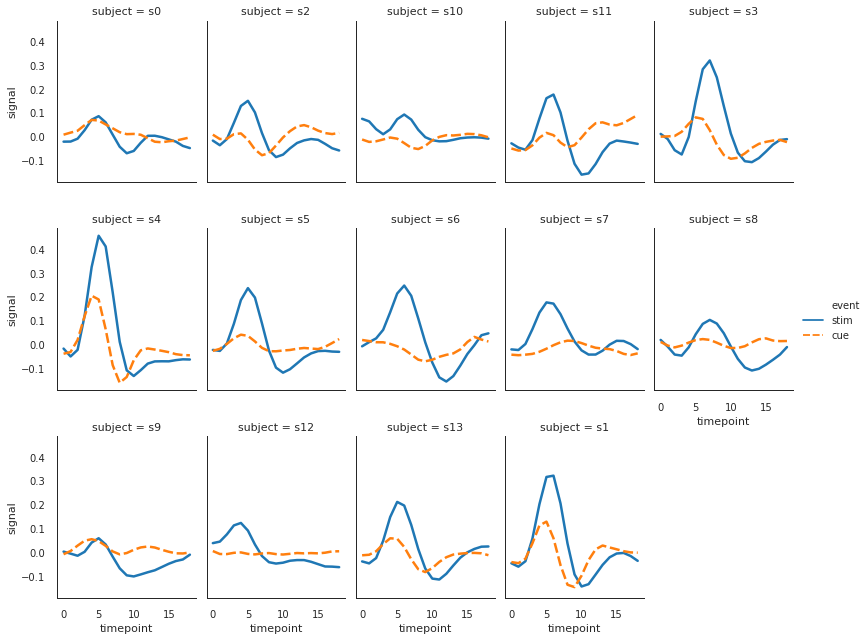

In [46]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));
plt.show()

In the following example we want to compare the distribution of price from the diamonds dataset by color, and so it makes sense to create density plots of the price distribution and stack them one below the next so we can visually compare them. 

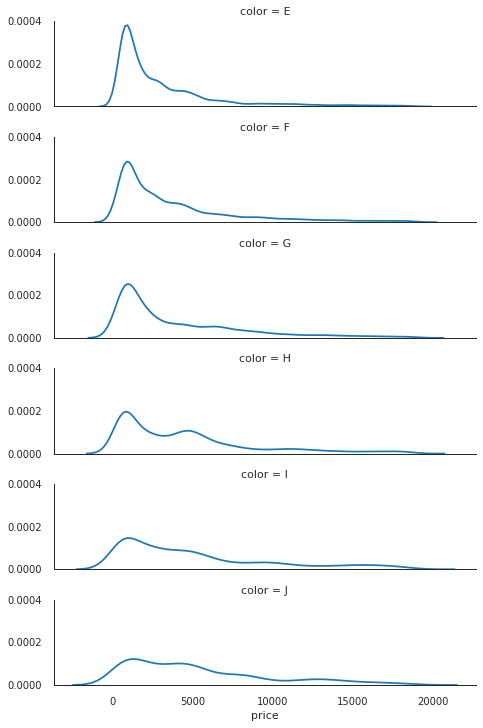

In [47]:
ordered_colors = ['E','F','G','H','I','J']
g = sns.FacetGrid(data = diamonds, row = 'color', height = 1.7, 
                  aspect = 4, row_order = ordered_colors)
g.map(sns.kdeplot, 'price');
plt.show()

You need to use `FacetGrid` to create sets of univariate plots since there is no particular method that allows univariate plots over a grid like `relplot` for bivariate plots.

### Pairs plots

The pairs plot is a quick way to compare every pair of variables in a dataset (or at least, every pair of continuous variables) in a grid. You can specify what kind of univariate plot will be displayed on the diagonal locations on the grid, and which bivariate plots will be displayed on the off-diagonal locations. 

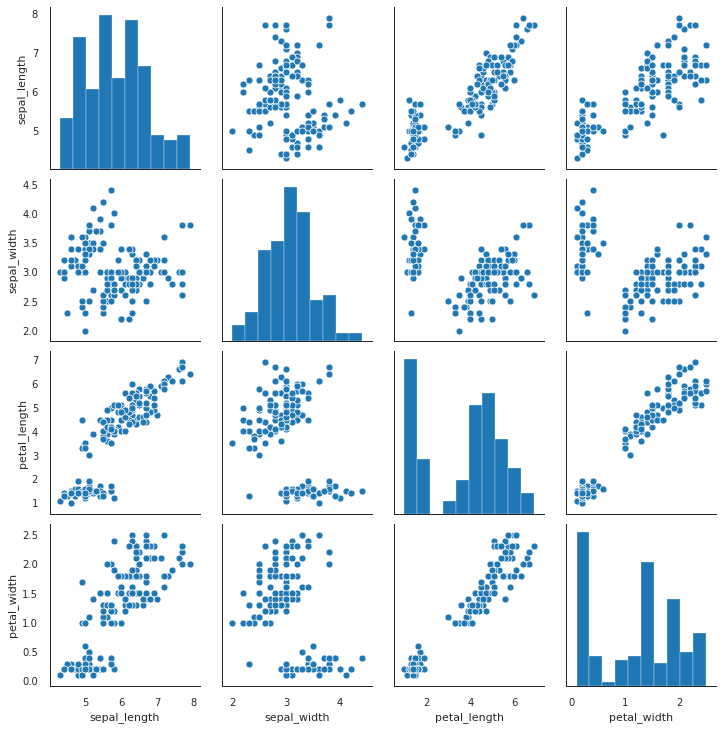

In [48]:
sns.pairplot(data=iris);
plt.show()

You can achieve more customization using `PairGrid`.

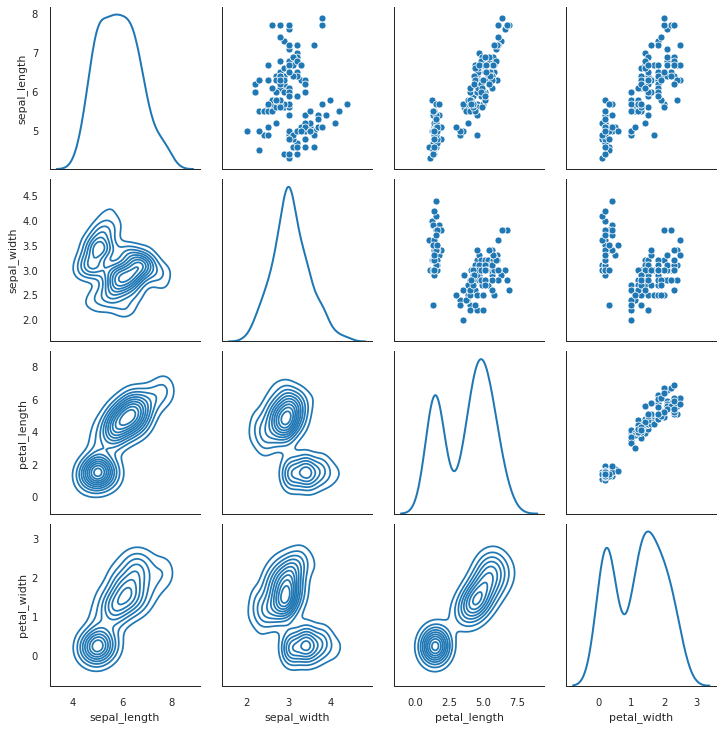

In [49]:
g = sns.PairGrid(iris, diag_sharey=False);
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot, colors="C0");
g.map_diag(sns.kdeplot, lw=2);
plt.show()

## Customizing the look 

### Themes

There are several [themes](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) available in the modern `matplotlib`, some of which borrow from `seaborn`. You can see the available themes and play around. 

In [50]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

See some examples below.

findfont: Font family ['Futura Medium'] not found. Falling back to DejaVu Sans.


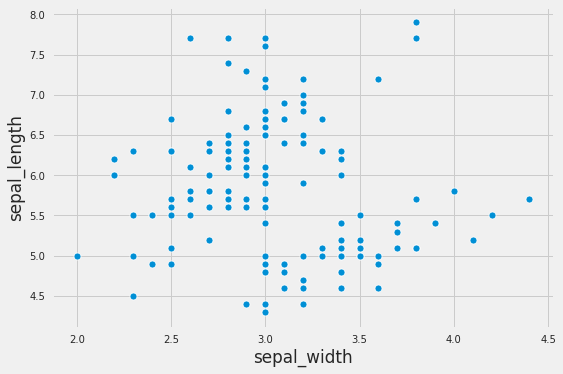

In [51]:
plt.style.use('fivethirtyeight')
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length');
plt.show()

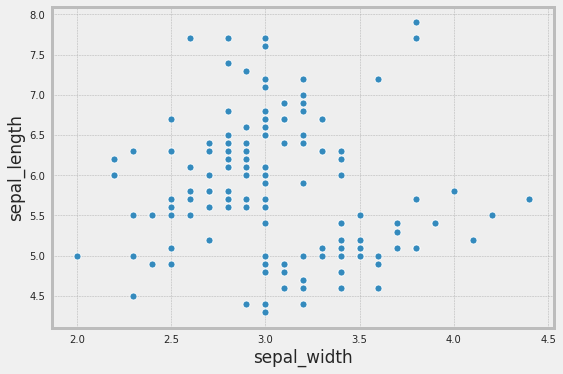

In [52]:
plt.style.use('bmh')
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length');
plt.show()

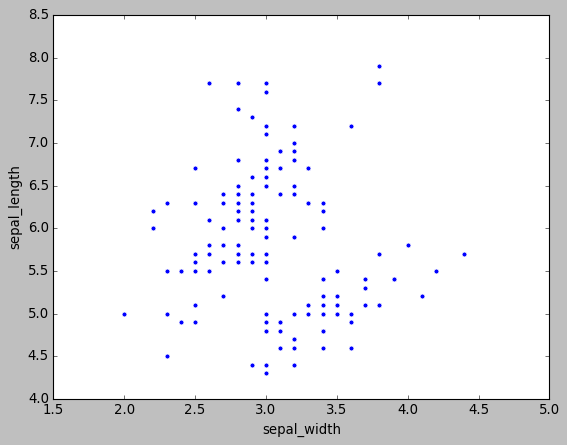

In [53]:
plt.style.use('classic')
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length');
plt.show()

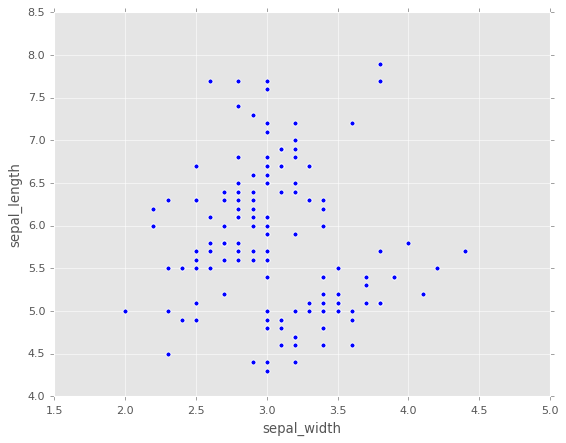

In [54]:
plt.style.use('ggplot')
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length');
plt.show()

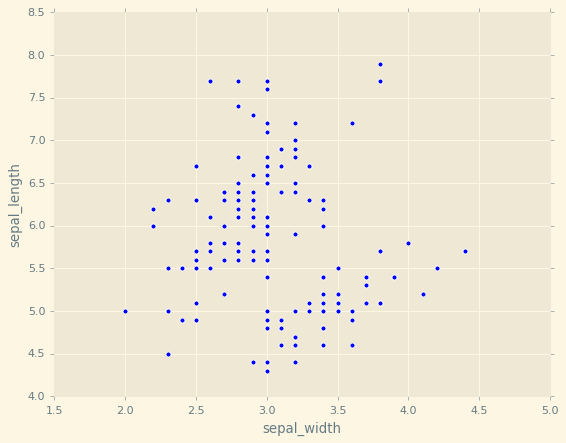

In [55]:
plt.style.use('Solarize_Light2')
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length');
plt.show()

> One small syntax point. You may have noticed in your own work that you get a little annoying line in the output when you plot. You can prevent that from happening by putting a semi-colon (`;`) after the last plotting command

## Finer control with matplotlib

![https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py](graphs/matplotlib-anatomy.png)

As you can see from the figure, you can control each aspect of the plot displayed above using `matplotlib`. I won't go into the details, and will leave it to you to look at the `matplotlib` [documentation](https://matplotlib.org/contents.html) and [examples](https://matplotlib.org/gallery/index.html) if you need to customize at this level of granularity. 

The following is an example using pure `matplotlib`. You can see how you can build up a plot. The crucial part here is that you need to run the code from each chunk together.  

In [56]:
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

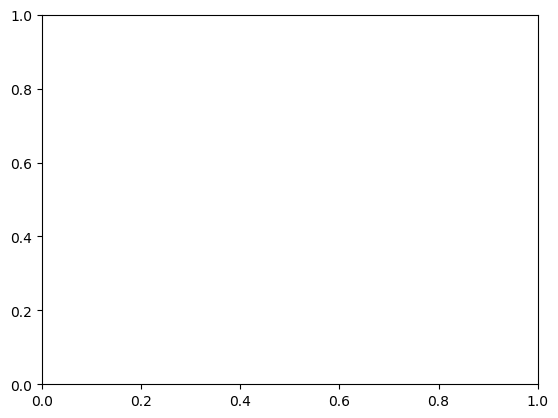

In [57]:
plt.style.use('default')
fig, ax = plt.subplots()
plt.show()

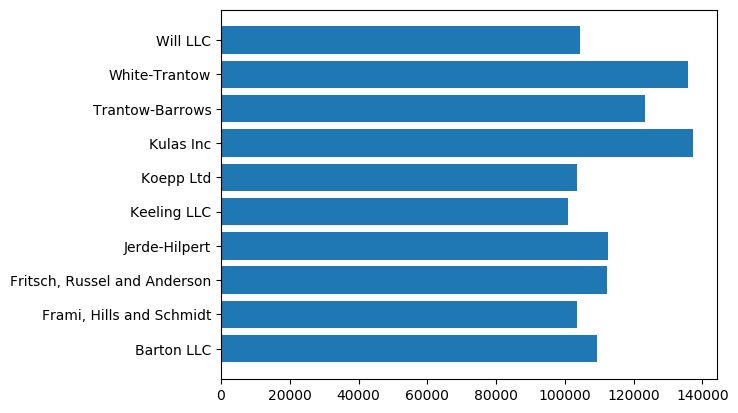

In [58]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data);
plt.show()

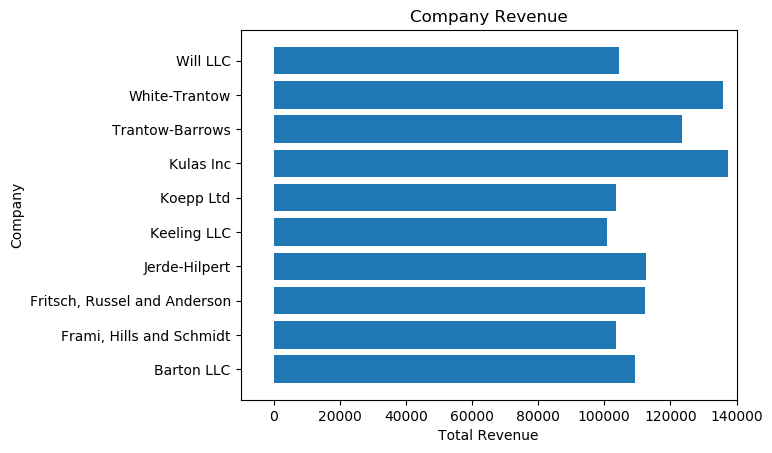

In [59]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
ax.set(xlim = [-10000, 140000], xlabel = 'Total Revenue', ylabel = 'Company', 
       title = 'Company Revenue');
plt.show()

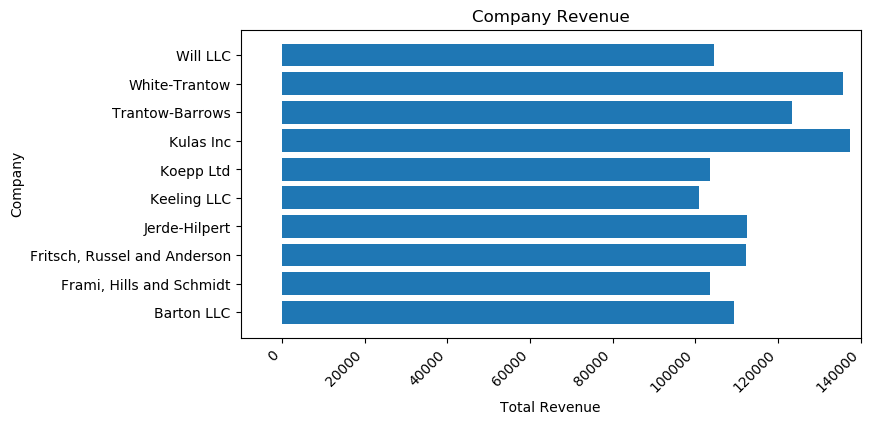

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue');
plt.show()

After you have created your figure, you do need to save it to disk so that you can use it in your Word or Markdown or PowerPoint document. You can see the formats available. 

In [61]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

The type will be determined by the ending of the file name. You can add some options depending on the type. I'm showing an example of saving the figure to a PNG file. Typically I'll save figures to a vector graphics format like PDF, and then convert into other formats, since that results in minimal resolution loss. You of course have the option to save to your favorite format.

In [62]:
# fig.savefig('sales.png', dpi = 300, bbox_inches = 'tight') 

### Matlab-like plotting

`matplotlib` was originally developed to emulate Matlab. Though this kind of syntax is no longer recommended, it is still available and may be of use to those coming to Python from Matlab or Octave. 

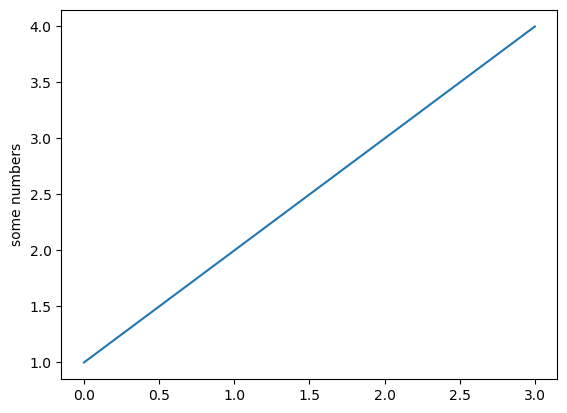

In [63]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4]);
plt.ylabel('some numbers');
plt.show()

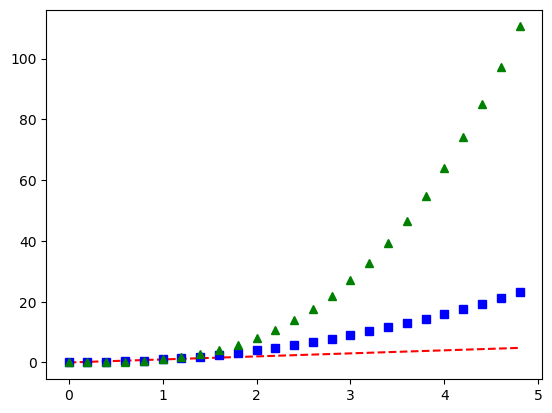

In [64]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');
plt.show()

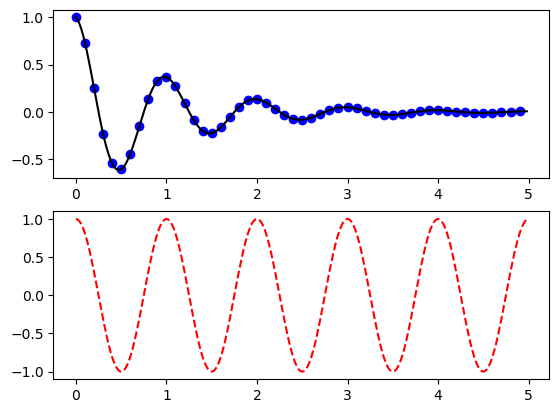

In [65]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure();
plt.subplot(211);
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k');

plt.subplot(212);
plt.plot(t2, np.cos(2*np.pi*t2), 'r--');
plt.show()

## Resources

A really nice online resource for learning data visualization in Python is the [Python Graph Gallery](https://python-graph-gallery.com/). This site has many examples of different kinds of plots using `pandas`, `seaborn` and `matplotlib`